# Stock Profits vs Interest rate
Question : Is there a correlation between Stock Price trends and Fund Interest rate trends? Will examine this by calculating the stock data over a span of 10 years.

Conclusion : Based on an analysis of ten years of data, stock prices and interest rates exhibited similar trends over time.
## Monthly closing Stock price and Interest rate (y-axis), Year, Month combined (x-axis) for 10 years

# Part 1: Find Monthly Closing Stock Price in US

In [1]:
# Common_Stockdata.get_stock_data Module import
from Common_Module.Common_Stockdata import get_stock_data
from Common_Module.Common_InterestRate import get_interest_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import calendar

In [2]:
# Load the Stock DataFrame using the function from common module
stock_info_df = get_stock_data()
stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1091,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1092,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1093,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1094,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1095,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
3602,2010-01-08,46.04,46.5500,45.9300,46.55,88886600,2010,1
3603,2010-01-07,46.20,46.2700,45.9200,46.17,77094100,2010,1
3604,2010-01-06,46.39,46.5500,46.0700,46.14,96033000,2010,1
3605,2010-01-05,46.38,46.5000,46.1600,46.42,62935600,2010,1


In [3]:
# Monthly Stock Closing dataFrame
# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_44252\3413687937.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2010,January,46.42
1,2010,February,43.26
2,2010,March,45.41
3,2010,April,48.16
4,2010,May,49.93
...,...,...,...
115,2019,August,190.15
116,2019,September,185.65
117,2019,October,187.27
118,2019,November,198.87


# Part 2: Find Monthly Federal Interest Rate

In [4]:
# Load the Fed Fund rate DataFrame using the function from common module
InterestRate_Data_df = get_interest_data()
InterestRate_Data_df["Date"] = InterestRate_Data_df["Date"].astype('datetime64[ns]')
InterestRate_Data_df

,Date,Interest_Rate,Year,Month,Day
0,2010-01-01,0.11,2010,1.0,01
1,2010-02-01,0.13,2010,2.0,01
2,2010-03-01,0.16,2010,3.0,01
3,2010-04-01,0.20,2010,4.0,01
4,2010-05-01,0.20,2010,5.0,01
...,...,...,...,...,...
115,2019-08-01,2.13,2019,8.0,01
116,2019-09-01,2.04,2019,9.0,01
117,2019-10-01,1.83,2019,10.0,01
118,2019-11-01,1.55,2019,11.0,01


In [5]:
# Extract 'Year' and 'Month' from 'Date'
InterestRate_Data_df['Year'] = InterestRate_Data_df['Date'].dt.year
InterestRate_Data_df['Month'] = InterestRate_Data_df['Date'].dt.strftime('%B')  # Convert date to month name
InterestRate_Data_df.rename(columns={'Interest_Rate': 'Rate'}, inplace=True)   # Rename "Interest_Rate" column to "Rate"


# Optionally, rearrange columns if needed
InterestRate_Data_df = InterestRate_Data_df[['Year', 'Month', 'Rate']]

# Convert 'Rate' to float, handle non-numeric issues
InterestRate_Data_df['Rate'] = pd.to_numeric(InterestRate_Data_df['Rate'], errors='coerce')
InterestRate_Data_df["Year"] = InterestRate_Data_df["Year"].astype('str')


InterestRate_Data_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_44252\645682498.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InterestRate_Data_df['Rate'] = pd.to_numeric(InterestRate_Data_df['Rate'], errors='coerce')
C:\Users\junhy\AppData\Local\Temp\ipykernel_44252\645682498.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  InterestRate_Data_df["Year"] = InterestRate_Data_df["Year"].astype('str')


,Year,Month,Rate
0,2010,January,0.11
1,2010,February,0.13
2,2010,March,0.16
3,2010,April,0.20
4,2010,May,0.20
...,...,...,...
115,2019,August,2.13
116,2019,September,2.04
117,2019,October,1.83
118,2019,November,1.55


# Part 3: Find Monthly closing Stock price and Interest rate over 10 years

In [6]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Interest Rate)

MonthlyClose_InterestRate_df = pd.merge(monthly_close_final_df, InterestRate_Data_df, on= ["Year","Month"], how="inner")
MonthlyClose_InterestRate_df

,Year,Month,Monthly_Close,Rate
0,2010,January,46.42,0.11
1,2010,February,43.26,0.13
2,2010,March,45.41,0.16
3,2010,April,48.16,0.20
4,2010,May,49.93,0.20
...,...,...,...,...
115,2019,August,190.15,2.13
116,2019,September,185.65,2.04
117,2019,October,187.27,1.83
118,2019,November,198.87,1.55


C:\Users\junhy\AppData\Local\Temp\ipykernel_44252\1233137110.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyClose_InterestRate_df['Date'] = pd.to_datetime(MonthlyClose_InterestRate_df['Year'].astype(str) + ' ' + MonthlyClose_InterestRate_df['Month'])


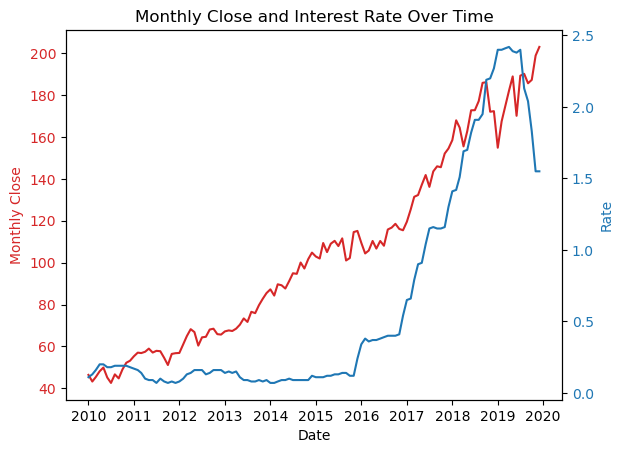

In [7]:
# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyClose_InterestRate_df['Date'] = pd.to_datetime(MonthlyClose_InterestRate_df['Year'].astype(str) + ' ' + MonthlyClose_InterestRate_df['Month'])

# Plotting
fig, ax1 = plt.subplots()

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Close', color=color)
ax1.plot(MonthlyClose_InterestRate_df['Date'], MonthlyClose_InterestRate_df['Monthly_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Rate', color=color)  
ax2.plot(MonthlyClose_InterestRate_df['Date'], MonthlyClose_InterestRate_df['Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly Close and Interest Rate Over Time')
plt.savefig("output_data/MonthlyClose_InterestRate_OverTime.png")
plt.show()